# Выявление закономерностей, определяющих успешность игры 

Из открытых источников доступны исторические данные о продажах игр, возрастном рейтинге, оценок пользователей и экспертов, жанрах и платформах. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании магазину "Стримчик".

План исследования:

1. [Обработка исходных данных.](#pred)
2. [Исследовательский анализ данных.](#eda)
3. [Определение временного периода, который поможет спрогнозировать продажи 2017 г.](#3)
4. [Исследования продаж по платформам.](#4)
5. [Определение корреляции оценок критиков и пользователей и продаж.](#7)
6. [Определение и исследование наиболее популярных жанров.](#6)
7. [Определение наиболее перспективных платформ.](#5)
8. [Портрет пользователя](#11)
9. [Определение влияния возрастного рейтинга на продажи](#8)
10. [Проверка гипотез](#9)
11. [Подборка наиболее оптимальных платформы, жанра и возрастного рейтинга для распределения рекламного бюджета. Вывод](#10)


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('C:/Users/Nick/yandex_module_1_sbornuu/games.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Названия столбцов некорректны, исправил заглавные буквы на строчные.

Пропуски в шести столбцах: *name, year_of_release, genre, critic_score, user_score, rating*.

Если получится избавиться от пропусков можно будет изменить тип данных столбцов *year_of_release, critic_score* на int. Столбец *user_score* изменю пока со строчного типа данных на float64, так как там пропуски.

## Предобработка данных <a id="pred"></a>

### Аномалии и дубликаты

In [6]:
df['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [7]:
df[df.duplicated(['name', 'platform'], keep=False)].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
df[df.duplicated(['name', 'year_of_release', 'platform'], keep=False)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [9]:
# удаляю строку с подозреваемым дубликатом
df = df.drop(labels = [16230], axis = 0)
df[df.duplicated(['name', 'year_of_release', 'platform'], keep=False)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df.loc[(df['name'] == 'Madden NFL 13') & (df['year_of_release'] == 2012) & (df['platform'] == 'PS3'), 'eu_sales'] = 0.23

Подозрительна игра Madden NFL 13. В строке 16230 значения всех признаков совпадают кроме продаж, там нули, и только в Европе продажи 0.01. Возможно, это какое-то большое дополнение именно для Европы. Я удалил неполный дубликат и нагородил три условия.

Кстати, самая популярная игра NFS: Most Wanted.

In [11]:
df['genre'].value_counts()

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [12]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [13]:
print(df['rating'].value_counts())
display(df['rating'].describe())
df.query('rating == "AO"').head()

E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


count     9948
unique       8
top          E
freq      3989
Name: rating, dtype: object

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


In [14]:
df.query('rating == "K-A"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Неявных дубликатов в жанрах и платформах нет. В столбце возрастного рейтинга есть неопознанный рейтинг по системе ESRB: K-A. Это в принципе устаревший рейтинг E. Заменю К-А на Е. Всего одна игра с возрастным рейтингом AO - GTA: San Andreas.

In [15]:
df['rating'] = df['rating'].str.replace('K-A', 'E')

In [16]:
df['rating'].value_counts()

E       3992
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

In [17]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16445.000000,16714.000000,16714.000000,16714.000000,16714.000000,8136.000000
mean,2006.484281,0.263393,0.145068,0.077622,0.047345,68.965954
std,5.877071,0.813625,0.503353,0.308862,0.186736,13.938153
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


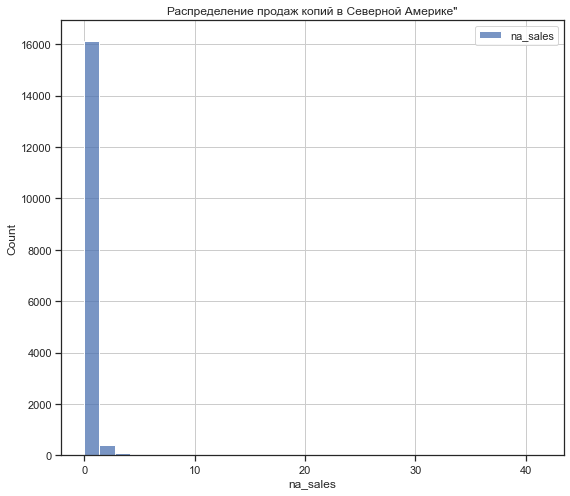

In [18]:
sns.set(rc={'figure.figsize':(9,8)})
sns.set_style("ticks",{'axes.grid' : True})
ax = sns.histplot(data=df, x='na_sales', bins=30, legend=True)
plt.legend(labels=['na_sales'])
ax.set_title(r'Распределение продаж копий в Северной Америке"');

Отрицательных значений в стобцах оценок и продаж нет. 

Медиана продаж близка к нулю, среднее больше медианы, значит, есть большой правый хвост, значительное количество проданных копий до 3 млн.

Оценки больше 100 в *critic_score* нет.

Столбец *user_score* не отразился в describe(), так как в нем есть строчные значения tbd. С ним я разберусь позже в пропусках.

### Пропуски

In [19]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Столбец name

In [20]:
df[df['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалю две строки с пропусками в названии игры. В этих строках известно название платформы, но ничего страшного, это всего лишь 0.01% от данных.

In [21]:
df = df.dropna(axis='index', how='any', subset=['name']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Столбец year_of_release

In [22]:
df['year_of_release'].isna().sum()

269

In [23]:
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [24]:
df = df.dropna(axis=0, subset=['year_of_release'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце год релиза было 269 пропусков. Это 1.6% от всех данных. Удалил пропуски

#### Столбец genre

In [26]:
df['genre'].isna().sum()

0

Пропуски из этого столбца ушли вместе с удалением пропусков из столбца названий игр.

#### Столбец critic_score

In [27]:
df[df['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [28]:
df['critic_score'].isna().sum()

8461

In [29]:
# смотрю совпадающие пропуски по столбцам
df.query('critic_score.isna() and user_score.isna() and rating.isna()')['platform'].count()

6534

In [30]:
df.query('critic_score.isna() and ~(user_score.isna()) and ~(rating.isna())').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+
437,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,1.87,0.97,0.00,0.30,NaN,8,E
494,FIFA 15,X360,2014.0,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E
505,Imagine: Babyz,DS,2007.0,Simulation,1.30,1.26,0.00,0.31,NaN,7.7,E
519,Finding Nemo,GBA,2003.0,Action,1.59,1.05,0.04,0.14,NaN,7,E


In [31]:
df.query('critic_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [32]:
# создаю датафрейм со стандартным отклонением оценок критиков
std_critic = df.query('name.duplicated()').pivot_table(index='platform', columns='name', values='critic_score').std()
std_critic = std_critic.fillna(0).reset_index()
std_critic.columns = ['name', 'std']

In [33]:
# склеиваю в один датафрейм оценки критиков и основной
df = df.merge(std_critic, on='name', how='outer')

In [34]:
print(df.query('critic_score.isna()')['platform'].value_counts().head(10))
df.query('critic_score.isna()').describe()

DS      1413
PS       994
PS2      852
PSP      737
Wii      718
PS3      502
GBA      381
3DS      346
X360     338
N64      316
Name: platform, dtype: int64


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,std
count,8461.000000,8461.000000,8461.000000,8461.000000,8461.000000,0.0,739.000000
mean,2005.819643,0.178603,0.085671,0.099788,0.023684,NaN,2.129689
std,7.044294,0.719761,0.322860,0.345986,0.089195,NaN,3.644819
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2001.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,2008.000000,0.020000,0.000000,0.000000,0.000000,NaN,0.000000
75%,2011.000000,0.140000,0.050000,0.070000,0.020000,NaN,2.828427
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,27.577164


Судя по по всему между пропусками в столбце оценок критиков и столбцах оценок пользователей и рейтинга присвоения есть связь - 78% процентов совпадений. 

В названиях игр много японских. Пропуски в старых японских платформах Nintendo преобладают. Среднее число проданных копий в Японии больше, чем в Европе - 0.1 против 0.09, хотя в общей выборке Европа впереди Японии почти в два раза(0.15 против 0.08).

Возможно, играм, которые выпускала Япония не могли присвоить рейтинг и дать оценку.

Стандартное отклонение среднего оценок критиков на разных платформах очень мало, чаще его нет. То есть часто оценки по платформам совпадают, хотя есть и значения, когда оценка отличается больше, чем на 6 баллов. Я считаю, что все-таки корректно будет заменить пропуски средним по платформам в строках, где стандартное отклонение не больше 6. Считаю, что ошибка в 6% допустима.

In [35]:
# заменяю пропуски по условию, что стандартное отклонение не превышает 6
df['critic_score'] = (df['critic_score'].fillna(df.query('std <= 6')
                                        .groupby('name')['critic_score']
                                        .transform('mean')).round()
                     )
df['critic_score'].isna().sum()

7808

#### Столбец user_score

In [36]:
df['user_score'].isna().sum()

6605

In [37]:
df.query('user_score == "tbd"').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,std
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,1254.000000,775.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,60.591707,2.510354
std,3.484229,0.176593,0.112068,0.026395,0.039411,11.813291,3.790390
min,1997.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,53.000000,0.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,62.000000,0.577350
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000,4.163332
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000,21.126603


In [38]:
df.query('jp_sales < 0.5 and na_sales < 0.5 and eu_sales < 0.5').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,std
26,Grand Theft Auto: San Andreas,X360,2008.0,Action,0.08,0.02,0.0,0.01,94.0,7.5,M,0.000000
35,Grand Theft Auto: Vice City,PC,2003.0,Action,0.00,0.03,0.0,0.01,94.0,8.8,M,0.000000
49,Call of Duty: Black Ops 3,PC,2015.0,Shooter,0.00,0.25,0.0,0.01,NaN,NaN,NaN,NaN
58,Call of Duty: Black Ops II,WiiU,2012.0,Shooter,0.20,0.18,0.0,0.03,81.0,6.9,M,4.725816
63,Grand Theft Auto III,PC,2002.0,Action,0.00,0.01,0.0,0.00,93.0,8.4,M,0.000000


In [39]:
df.query('user_score == "tbd"')['platform'].count()

2376

In [40]:
df.query('user_score == "tbd" and other_sales > 1.09')['platform'].count()

0

In [41]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,std
215,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E,0.000000
352,FIFA Soccer 11,DS,2010.0,Sports,0.13,0.49,0.0,0.08,63.0,tbd,E,10.368221
379,Madden NFL 06,GBA,2005.0,Sports,0.17,0.06,0.0,0.00,71.0,tbd,E,8.983318
412,Madden NFL 2005,GC,2004.0,Sports,0.54,0.14,0.0,0.02,90.0,tbd,E,10.801234
482,Namco Museum,GC,2002.0,Misc,0.48,0.13,0.0,0.02,62.0,tbd,E,7.071068


In [42]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,std
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,8635.000000,5483.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.840533,2.744800
std,5.875546,0.818400,0.506731,0.311109,0.188011,14.038785,3.983633
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,4.242641
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,27.577164


tbd означает to be determined, оценка еще не определена. Возможно, слишком мало пользователей проголосовали, чтобы ставить игре оценку. Однако есть игры и с меньшими продажами и у них есть оценка пользователей. Мне не удалось выяснить причину появления tbd.

Я считаю, tbd по сути пропуск, который в будущем станет оценкой. Пока я заменю tbd на пропуск и изменю тип данных на float. 

In [43]:
df['user_score'] = df['user_score'].apply(pd.to_numeric,errors='coerce')

In [44]:
df.query('user_score == "tbd"')['platform'].count()

0

In [45]:
df['user_score'].isna().sum()

8981

In [46]:
df.query('name.duplicated()').pivot_table(index='platform', columns='name', values='user_score').std().mean()

0.7279649149872247

In [47]:
# проделываю то же, что и оценками критиков
std_user = df.query('name.duplicated()').pivot_table(index='platform', columns='name', values='user_score').std()
std_user = std_user.fillna(0).reset_index()
std_user.columns = ['name', 'user_std']

In [48]:
df = df.merge(std_user, on='name', how='outer')

In [49]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,std,user_std
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,NaN,NaN
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN,NaN
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,NaN,NaN


In [50]:
df['user_score'].isna().sum()

8981

In [51]:
df['user_score'] = df['user_score'].fillna(df.query('user_std <= 0.7').groupby('name')['user_score'].transform('mean')).round(1)
df['user_score'].isna().sum()

8409

In [52]:
df = df.drop(['std', 'user_std'], axis=1)

In [53]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E


In [54]:
df['user_score'].isna().sum()

8409

Заменил пропуски по тому же принципу, что и в столбце с оценкой критиков, взял предельное значение стандартного отклонения 0.7. Удалил промежуточные столбцы с std.

Остальные пропуски оставлю как есть.

#### Столбец rating

In [55]:
df['rating'].isna().sum()

6676

In [56]:
df.query('rating.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
7,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN
11,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
12,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
14,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
27,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
28,Super Mario World,GBA,2001.0,Platform,3.21,1.11,0.95,0.20,NaN,NaN,NaN


In [57]:
df.query('rating.isna() and user_score.isna()')['platform'].count()

6420

In [58]:
df.query('rating.isna()')['platform'].value_counts().head(10)

PS     986
DS     866
PS2    671
PSP    657
PS3    371
N64    316
Wii    309
GBA    297
3DS    289
PSV    279
Name: platform, dtype: int64

In [59]:
df['rating'] = df['rating'].fillna('Unknown')
df['rating'].value_counts()

Unknown    6676
E          3923
T          2905
M          1536
E10+       1393
EC            8
AO            1
RP            1
Name: rating, dtype: int64

Здесь также видим доминирование пропусков на старых японских платформах. Возможно, ESRB тогда не оценивала ни рейтинга, ни возрастную категорию, возможно, это вне ее юрисдикции. Я оставлю пропуски.

### Добавляю столбец суммарных продаж по регионам

In [60]:
total_sales = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.insert(8, 'total_sales', total_sales)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   total_sales      16443 non-null  float64
 9   critic_score     8635 non-null   float64
 10  user_score       8034 non-null   float64
 11  rating           16443 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [61]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Unknown
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Unknown
3,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
4,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E


## Исследовательский анализ данных <a id="eda"></a>

### Выпуск игр по годам

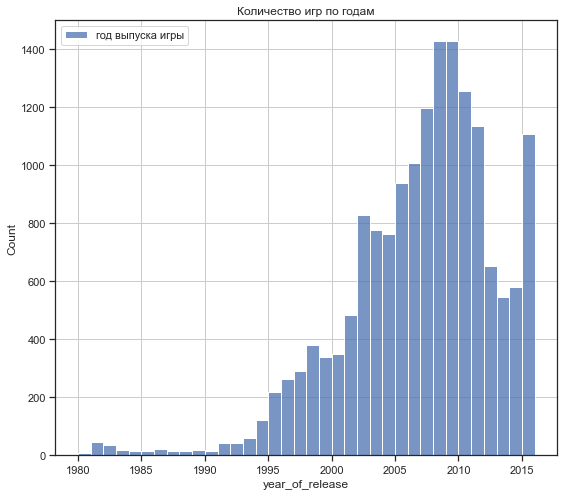

In [62]:
ax = sns.histplot(data=df, x='year_of_release', binwidth=1, legend=True);
plt.legend(labels=['год выпуска игры'])
ax.set_title(r'Количество игр по годам');

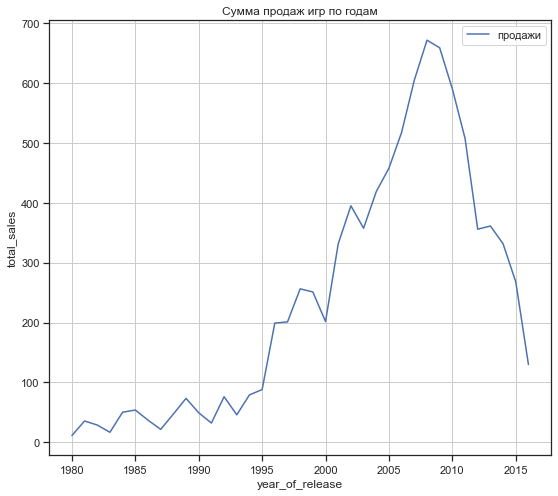

In [63]:
ax = sns.lineplot(x='year_of_release', y='total_sales', data=df.groupby('year_of_release').sum())
plt.legend(labels=['продажи'])
ax.set_title(r'Сумма продаж игр по годам');

Я посчитал, если одна игра выпустилась на двух, например, платформах, то это две разные игры.

Распределение скошено влево. Похоже на нормальное, не считая пика количества игр в 2016 году. Есть смысл отрезать выбросы. Я отрежу хвост до 1996 года, тогда количество игр превысило 200 шт., и был достаточно большой скачок в сравнении с 1995 годом. 

Построил график продаж по годам. Действительно, примерно с 1995 года наблюдается резкий рост вверх, пилообразный нестабильный период от 1980 до 1995 года отсеку. Несмотря на увеличение количества игр в 2016 году, продажи падают.

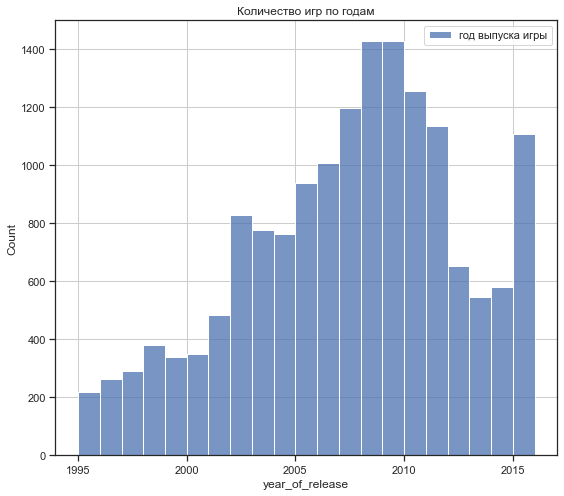

In [64]:
ax = sns.histplot(data=df, x='year_of_release', binwidth=1, binrange=(1995,2016), legend=True);
plt.legend(labels=['год выпуска игры'])
ax.set_title(r'Количество игр по годам');

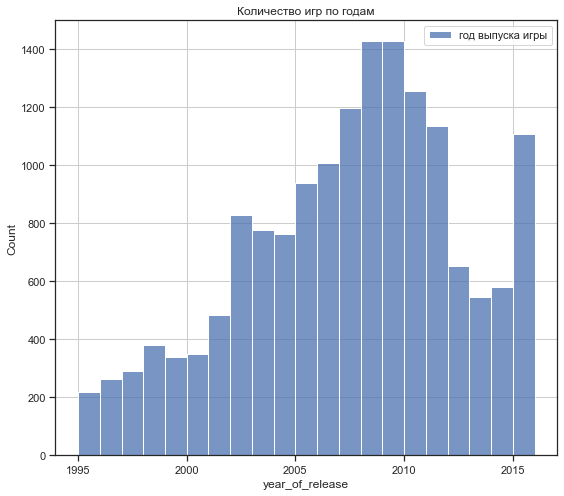

In [65]:
ax = sns.histplot(data=df, x='year_of_release', binwidth=1, binrange=(1995, 2016), legend=True);
plt.legend(labels=['год выпуска игры'])
ax.set_title(r'Количество игр по годам');

In [66]:
good_df = df.query('year_of_release >= 1996')

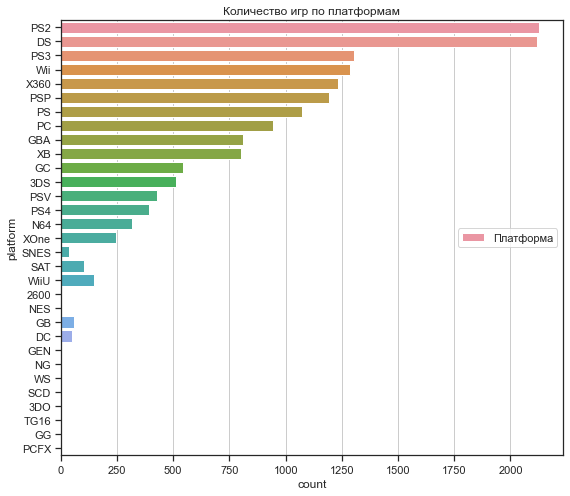

In [67]:
ax = sns.countplot(y='platform', data=good_df, order=df['platform'].value_counts().index);
plt.legend(labels=['Платформа'])
ax.set_title(r'Количество игр по платформам');

Количество игр по платформам. 

Топ 10:

1. PS2
2. DS
3. PS3
4. Wii
5. X360
6. PSP
7. PS
8. PC
9. XB
10. GBA

### Динамика продаж по платформам в год <a id="3"></a>

In [68]:
# группировка общих продаж по платформам
(good_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False).head(10)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


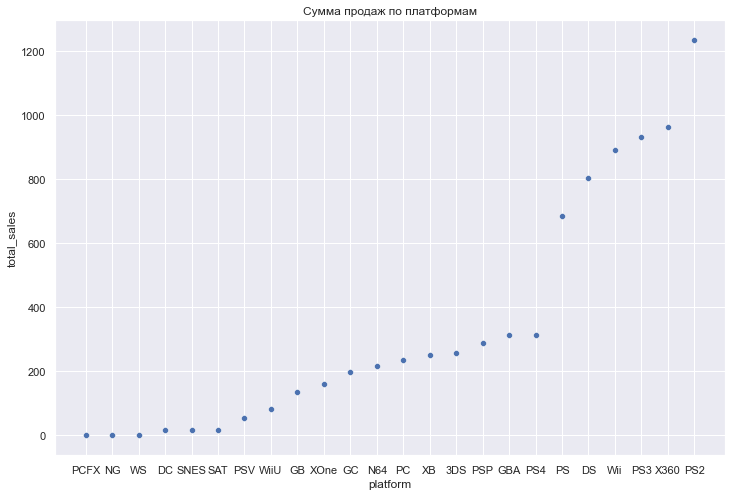

In [69]:
sns.set(rc={'figure.figsize':(12,8)});

ax = (sns.scatterplot(x='platform', y='total_sales',
                      data=good_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                      .sort_values(by='total_sales'))
     )
ax.set_title(r'Сумма продаж по платформам');

Наибольшую прибыль, начиная с 1996 года, принесли платформы:

* PS2
* X360
* PS3
* Wii
* DS
* PS

Разница между PS и ближайшей платформой PS4 350 млн. Посмотрим динамику по годам. Я исключу 6 платформ, у которых продажи колеблются около нуля.

In [70]:
good_df = good_df.query('platform not in ["PCFX", "NG", "WS", "DC", "SNES", "SAT"]')

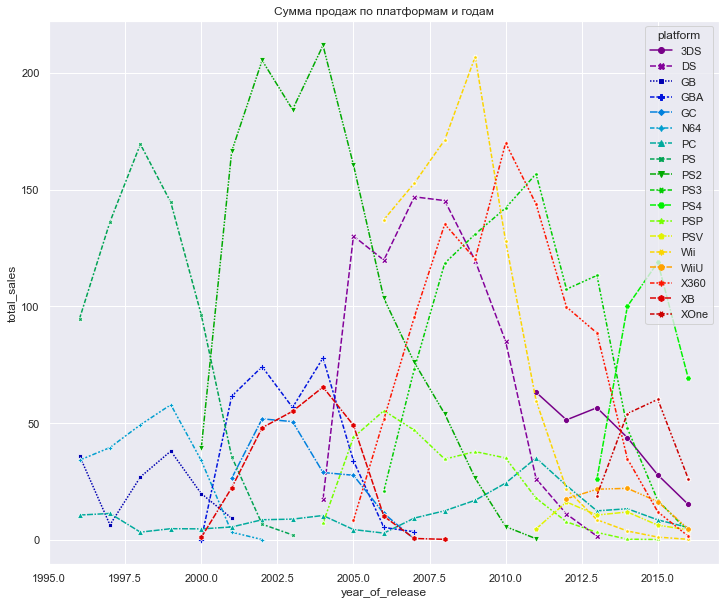

In [71]:
sns.set(rc={'figure.figsize':(12,10)})
ax = (sns.lineplot(data=good_df
                   .pivot_table(index=['platform','year_of_release'], 
                                            values='total_sales', aggfunc='sum')
                   .reset_index(), x='year_of_release', y='total_sales',
                   hue='platform', style='platform', markers=True, palette="nipy_spectral")
     )
ax.set_title(r'Сумма продаж по платформам и годам');

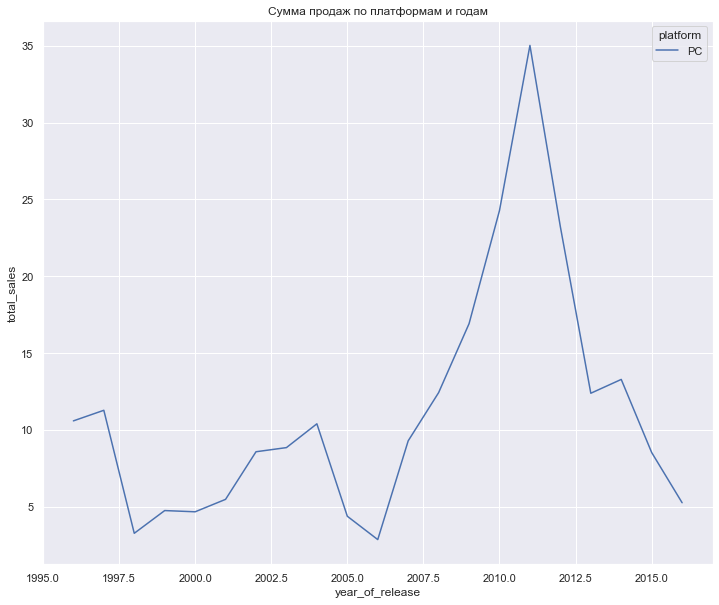

In [72]:
ax = (sns.lineplot(data=good_df
                   .query('platform == "PC"').pivot_table(index=['platform','year_of_release'], 
                                            values='total_sales', aggfunc='sum')
                   .reset_index(), x='year_of_release', y='total_sales', 
                   hue='platform', style='platform')
     )
ax.set_title(r'Сумма продаж по платформам и годам');

In [73]:
df.query('platform == "PC" and year_of_release in [2010, 2011, 2012] and total_sales > 2').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
116,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,1.16,2.12,0.0,0.60,3.88,94.0,8.1,M
181,Battlefield 3,PC,2011.0,Shooter,0.89,1.43,0.0,0.46,2.78,89.0,7.5,M
329,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,5.14,88.0,4.0,M
383,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.0,0.58,4.83,93.0,8.2,T
897,Star Wars: The Old Republic,PC,2011.0,Role-Playing,1.58,1.01,0.0,0.38,2.97,85.0,5.9,T
1288,Guild Wars 2,PC,2012.0,Action,0.96,1.07,0.0,0.27,2.30,90.0,7.9,T
1448,World of Warcraft: Cataclysm,PC,2010.0,Role-Playing,1.77,0.32,0.0,0.00,2.09,90.0,5.6,T


Платформы живут  6-8 лет. Это отчеливо прослеживается по сериям платформ PS и XB. Резкий пик прибыли приходится на отсечке двух лет после появления платформы на рынке, затем резкий спад, исключение: PC. Компьютер не приносит много прибыли, но стабилен. К 2013 году продажи по популярным когда-то платформам близятся к нулю. 

Посмотрим внимательней на период с 2011 года.

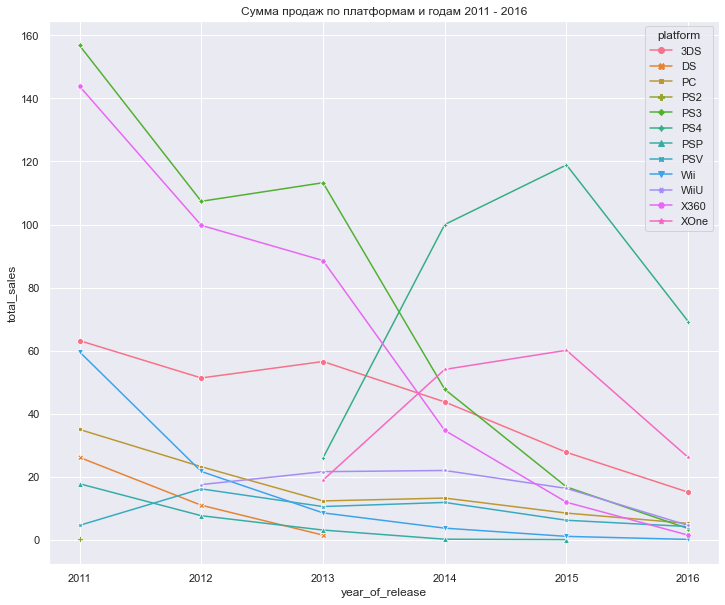

In [74]:
ax = (sns.lineplot(data=good_df.query('year_of_release >= 2011')
                   .pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
                   .reset_index(), x='year_of_release', y='total_sales', hue='platform',
                   style='platform', markers=True, dashes=False)
     )
ax.set_title(r'Сумма продаж по платформам и годам 2011 - 2016');

Из графика видно, что к 2016 году, продажи падают по всем платформам, а большинство платформ прекратили свое существование. Потенциал имеют три платформы (они же превышают барьер в 10 млн. проданных копий):
1. PS4
2. XOne
3. 3DS

3DS конечно с оговорками, после 2013 года продажи стабильно падают, но не резко. Я дам 3DS шанс, ведь в 2013 они все-таки смогли принести прибыли больше, чем в 2012. Я определю актуальный период с 2013 года по 2016. А наиболее перспективные платформы: **PS4, Xone**.

Я исключу PSP, так как за 2014 и 2015 год у нее продажи ноль или близки к нулю, а в 2016 ее вообще нет в статистике, возможно сама платформа снята с производства. По той же причине исключу DS.

По продажам Wii тоже смотрится не очень перспекивной, учитывая, что она появилась в 2006 году. Это очень много для приставки, но я ее оставлю в общем пуле.

In [75]:
actual = good_df.query('year_of_release >= 2013 and platform not in ["DS", "PSP"]').reset_index(drop=True)

### Диаграммы размаха продаж игр по платформам <a id="4"></a>

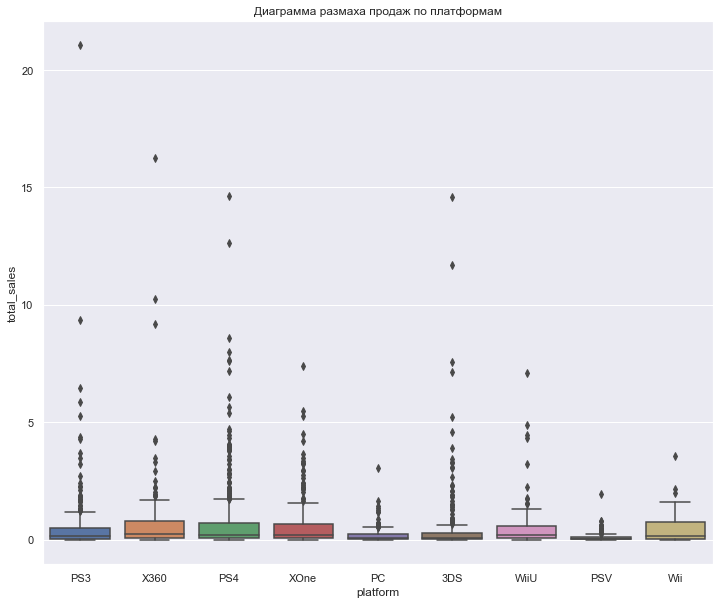

In [76]:
ax = sns.boxplot(x='platform', y='total_sales', data=actual)
ax.set_title(r'Диаграмма размаха продаж по платформам');

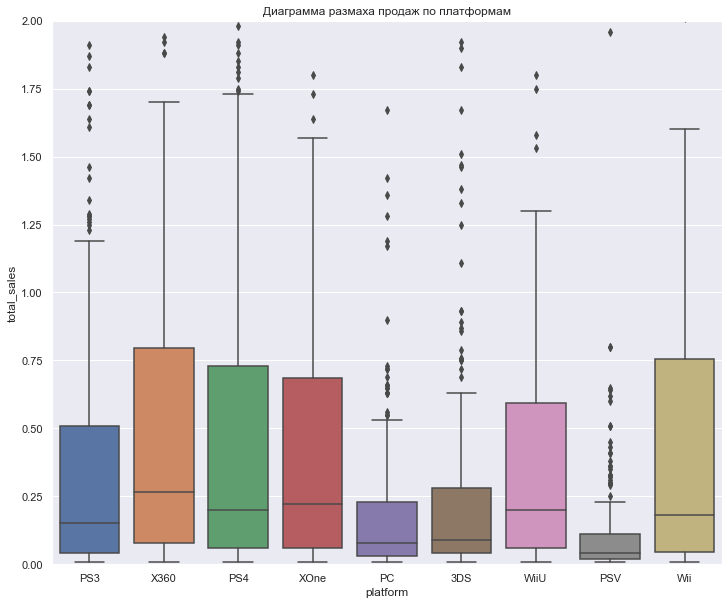

In [77]:
ax = sns.boxplot(x='platform', y='total_sales', data=actual)
ax.set_title(r'Диаграмма размаха продаж по платформам');
ax.set_ylim([0, 2]);

Ассиметрия данных наблюдается у всех платформ. Медианы ближе к 25 перцентилю, смещены в сторону меньших значений. Усы разной длины, очевидно, минусовых продаж ведь нет. 

У X360 наиболее широкий межквартильный интервал (второе место Wii), 3-ий квартиль превышает 0.75 млн. проданных копий игр. Медиана чуть больше 0.25 млн. Ни у одной платформы медиана не достигает отметки 0.25 млн. копий.  Однако X360 и Wii 2005, 2006  года производства, соответсвенно. Их время уходит...

Самый длинный ус у PS4, максимальное значение проданных копий почти 1.75 млн.

У 3DS медиана на уровне 0.10 млн проданных копий, максимальное значение в районе 0.6 млн. Много значений попадают в категорию выбросов. Но с выбросами отдельная история. У PS4, XOne и 3DS их так много, что закрадывается подозрение, что это и не выбросы вовсе.

У Wii, кстати, практически отсутствуют выбросы.

Если сравнивать PS4 и XOne, то они не сильно отличаются между собой, только максимальное значение у Wii меньше - не доходит и до 1.6 млн. копий.

### Корреляция продаж от оценок критиков и пользователей <a id="7"></a>

In [78]:
# переменная тольк с оценками за актуальный период
scores = actual.drop(columns =['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axis=1)

,year_of_release,total_sales,critic_score,user_score
year_of_release,1.000000,-0.235032,-0.027063,0.120795
total_sales,-0.235032,1.000000,0.388231,-0.033767
critic_score,-0.027063,0.388231,1.000000,0.559970
user_score,0.120795,-0.033767,0.559970,1.000000


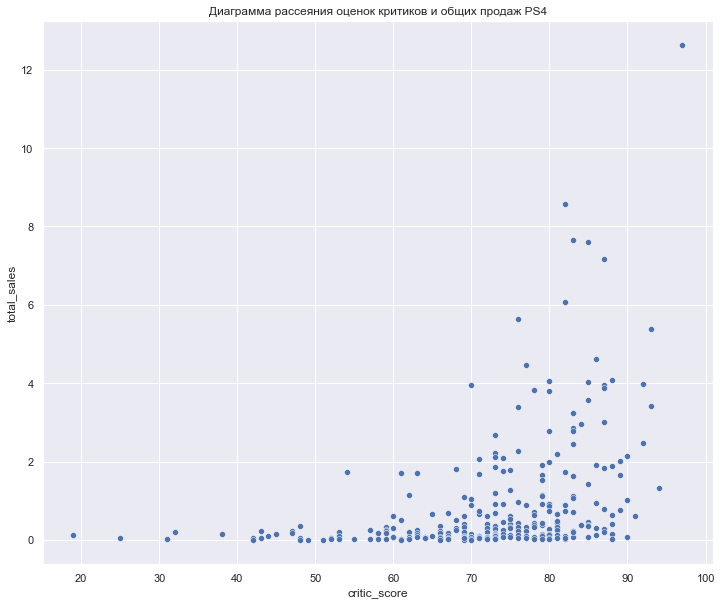

In [79]:
# функция для создания диаграмм рассеяния по оценкам критиков и пользователей
ax = sns.scatterplot(x='critic_score', y='total_sales', data=scores.query('platform == "PS4"'));
ax.set_title(r'Диаграмма рассеяния оценок критиков и общих продаж PS4');
scores.query('platform == "PS4"').corr(method='pearson')

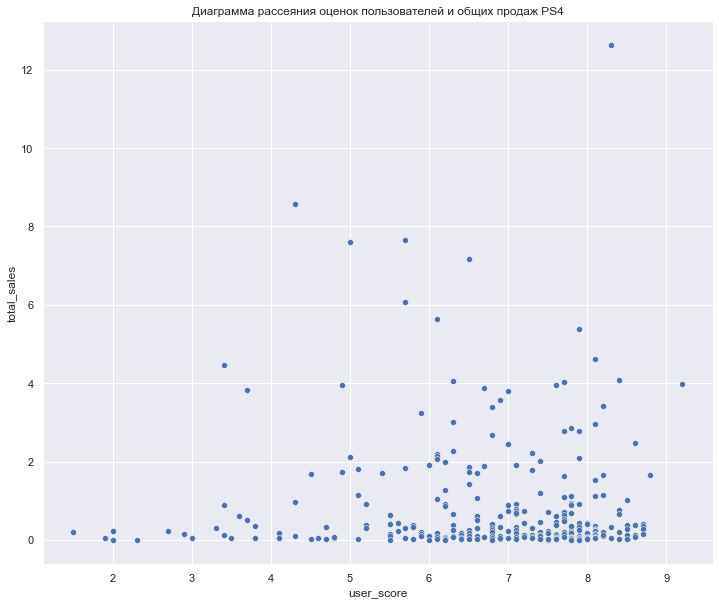

In [80]:
ax = sns.scatterplot(x='user_score', y='total_sales', data=scores.query('platform == "PS4"'));
ax.set_title(r'Диаграмма рассеяния оценок пользователей и общих продаж PS4');

По самой популярной платформе PS4 мы видим прямую корреляцию между оценками пользователей и критиков. 

Также видим, что количество проданных копий увеличивается при оценке критиков больше 60. Дальше с ростом оценок увеличиваются случаи больших продаж, но так же много остается и малых продаж. После отметки в 80 баллов, игры действительно продаются лучше, но количество таких игр небольшое. По коэфициенту Пирсона корреляция составляет 0.388. Но я бы не стал утверждать, что есть линейная четкая зависимость.

С оценками пользователей все еще менее однозначно. Рассеяние большое, как правило, большие оценки пользователей не сильно влияют на продажи. Встречаются случаи, когда оценка пользователей меньше 5 баллов, а игра все равно хорошо продалась на этой платформе.

,year_of_release,total_sales,critic_score,user_score
year_of_release,1.000000,-0.239183,0.048380,0.071506
total_sales,-0.239183,1.000000,0.376207,-0.093697
critic_score,0.048380,0.376207,1.000000,0.463328
user_score,0.071506,-0.093697,0.463328,1.000000


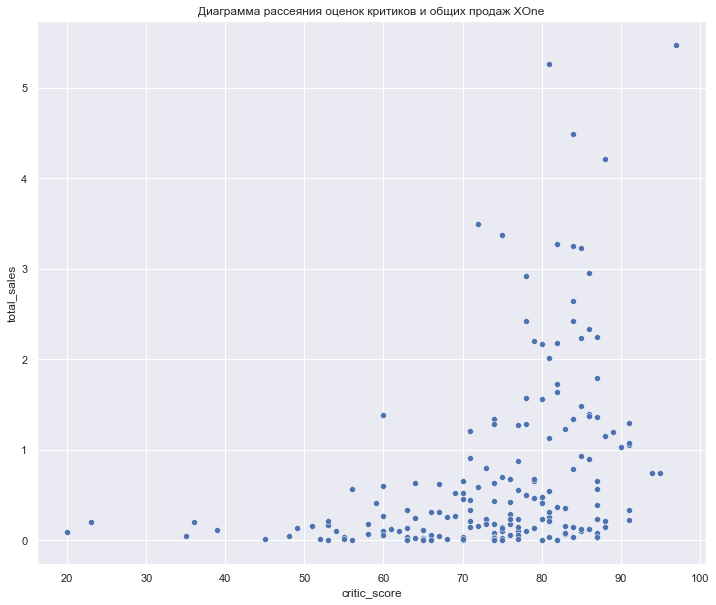

In [81]:
ax = sns.scatterplot(x='critic_score', y='total_sales', data=scores.query('platform == "XOne"'));
ax.set_title(r'Диаграмма рассеяния оценок критиков и общих продаж XOne');
scores.query('platform == "XOne"').corr(method='pearson')

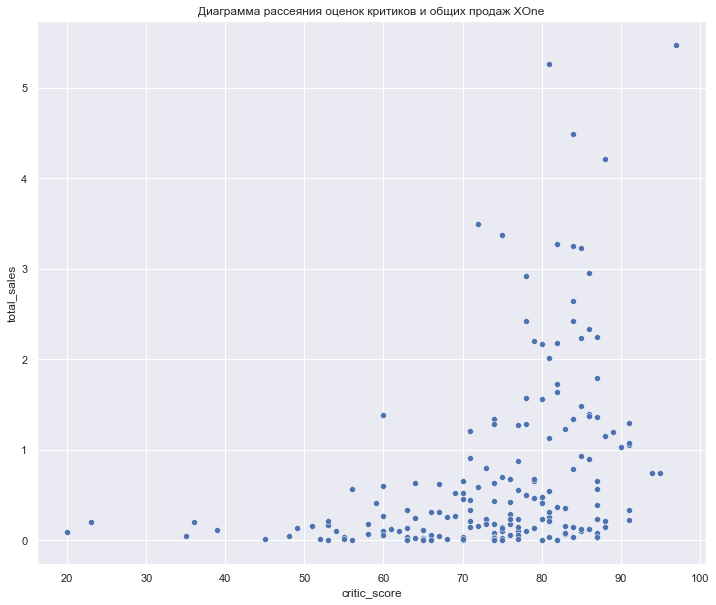

In [82]:
ax = sns.scatterplot(x='critic_score', y='total_sales', data=scores.query('platform == "XOne"'));
ax.set_title(r'Диаграмма рассеяния оценок критиков и общих продаж XOne');

У платформы XОne мы видим то же самое, что и у PS4.

У 3DS все то же, за исключением корреляции оценок пользователей и продаж. Рассеяние не большое и есть случаи больших продаж, если оценка пользователей высокая. Возможно, в сообществе доверяют друг другу, но это не точно. 

В целом количество продаж небольшое по сравнению с предыдущими двумя платформами

### Успешные жанры <a id="5"></a>

In [83]:
actual= good_df.query('year_of_release >= 2013').reset_index(drop=True)
len(df[df.year_of_release >= 2013].platform.unique()), len(actual.platform.unique())

(11, 11)

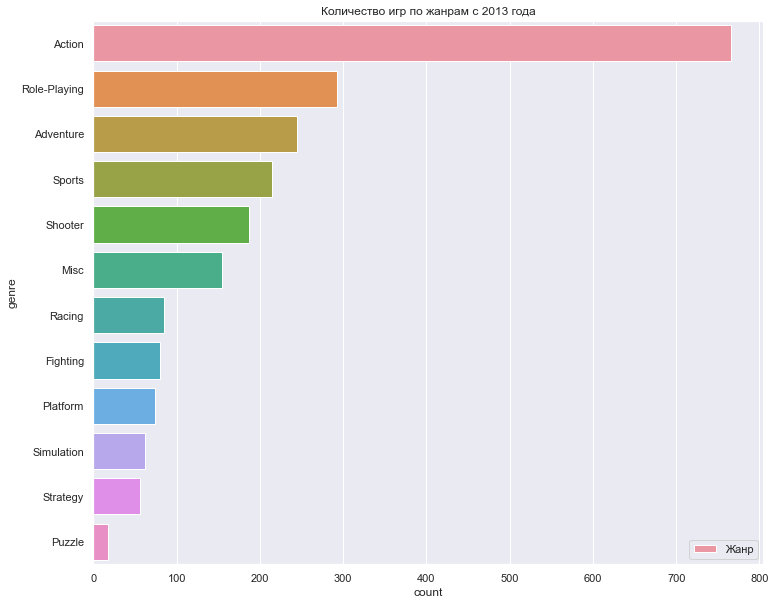

In [84]:
ax = sns.countplot(y='genre', data=actual, order=actual['genre'].value_counts().index);
plt.legend(labels=['Жанр'])
ax.set_title(r'Количество игр по жанрам с 2013 года');

Топ-5:

1. Action с больши отрывом
2. Role-Playing
3. Adventure
4. Sports
5. Shooter

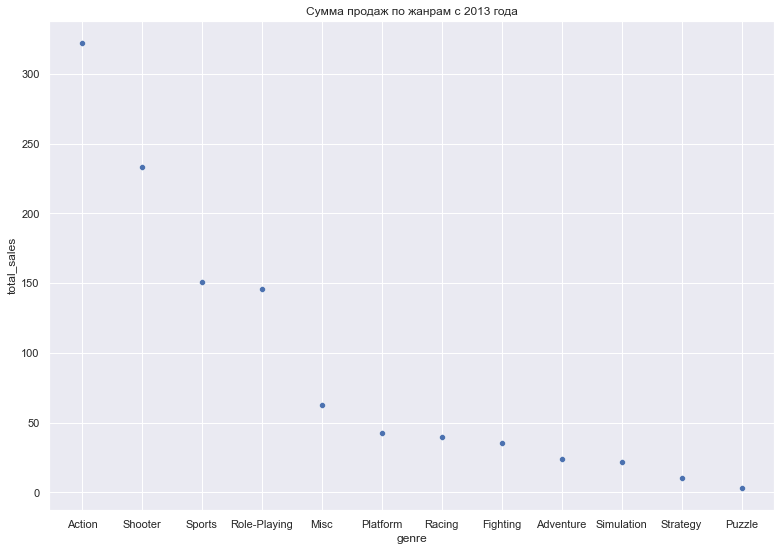

In [85]:
sns.set(rc={'figure.figsize':(13,9)});
ax = (sns.scatterplot(data=actual
                   .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                   .reset_index().sort_values(by='total_sales', ascending=False), x='genre', y='total_sales')
     )
ax.set_title(r'Сумма продаж по жанрам с 2013 года');

В период с 2013 выделяются Экшен, Шутеры, РПГ и Спорт симуляторы.

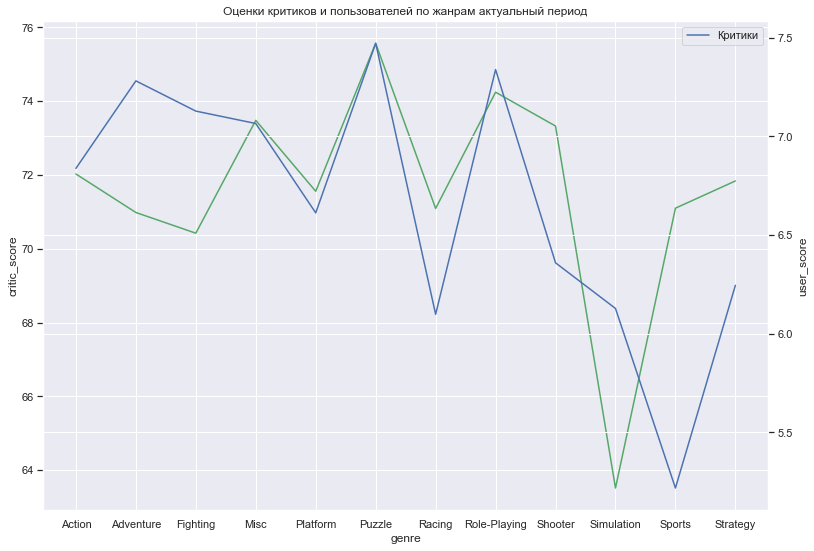

In [86]:
ax = sns.lineplot(data=actual.pivot_table(index='genre', values=['critic_score', 'user_score']), x='genre', y='critic_score', color="g")
ax2 = plt.twinx()
ax1 = sns.lineplot(data=actual.pivot_table(index='genre', values=['critic_score', 'user_score']), x='genre', y='user_score', color="b", ax=ax2);

plt.legend(labels=['Критики'])
ax.set_title(r'Оценки критиков и пользователей по жанрам актуальный период');

Экшен самый популярный жанр и продаваемый, оценки критиков и пользователей - 72 и 6.8 баллов, соответственно. У Спорт симуляторов оценка критиков 64 баллов, а пользователей почти 6.7 баллов. Самый высокоценимый жанр среди критиков и пользователей это загадки, квесты - 75.8 и 7.4. У РПГ почти 75 и 7.2 баллов, соответсвенно.

В принципе средние оценки всех жанров не сильно друг от друга отличаются и достаточно высокие. Исключение: симуляторы (оценка пользователей 5 баллов) и спортивные состязания(оценка критиков 64 балла). В целом оценки почти не влияют на продажи копий, видимо тут больше корреляция с числом фанатов определенных жанров, ее аудиторией. в

В актуальном периоде оценки пользователей и критиков самые высокие у Adventure, Role-Playing, Puzzle. У Sports самая низкая оценка, тем не менее он топ 3 по продажам.

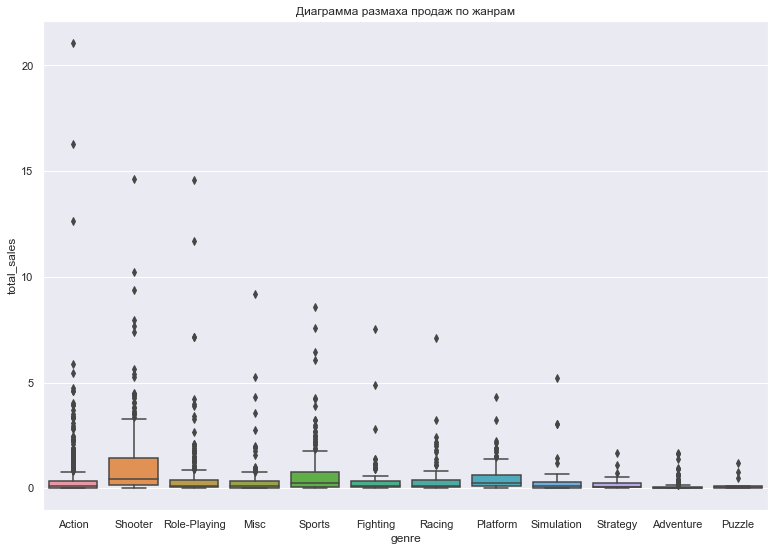

In [87]:
ax = sns.boxplot(x='genre', y='total_sales', data=actual)
ax.set_title(r'Диаграмма размаха продаж по жанрам');

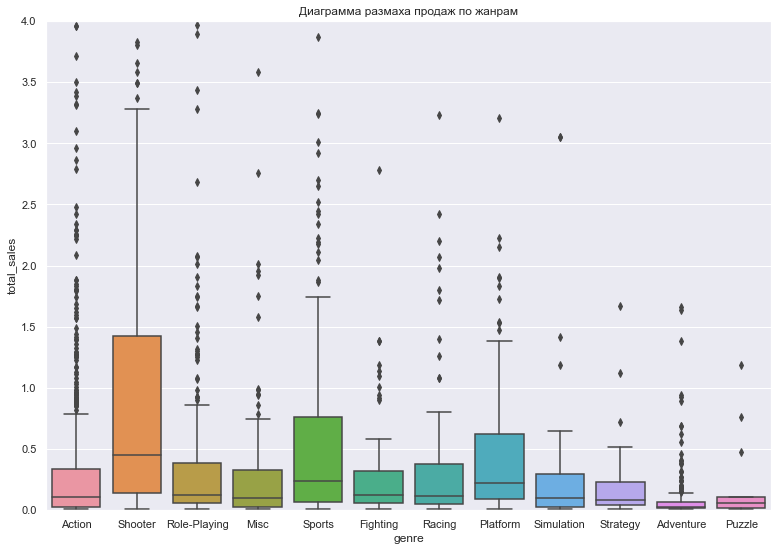

In [88]:
ax = sns.boxplot(x='genre', y='total_sales', data=actual)
ax.set_title(r'Диаграмма размаха продаж по жанрам');
ax.set_ylim([0, 4]);

По диаграммам размаха явно выделяются шутеры(2-ое место по суммарным продажам), широкий межквартильный интервал, максимальное значение около 3.3 млн. копий, правда, медиана смещена вниз ко второму квартилю. 

Тем не менее шутеры выглядят очень стабильно в отличие от Action(1-ое место по суммарным продажам), у которого много выбросов, медиана сильно смещена вниз. Role-Playing(один из лучших жанров по оценкам критиков и пользователей) смотрится примерно так же, как Action, выбросов, максимальное значение на уровне 0.8 млн. Sports по диаграмме размаха на втором месте после Shooter, но разница между ними большая: у шутеров 3-ий квартиль на уровне почти 1.5 млн., а у спортивных соревнований на уровне 0.8 млн.

Видимо, РПГ и Экшен больше зависят от успешности конкретной игры и менее стабильны. Но ААА проектов в этих жанрах много, судя по выбросам.

Осальные не продащиеся диаграммы не представляют интереса: узкие, с маленькими усами - соответсвуют своему статусу платформ с низкими суммарными продажами.

### Популярные жанры по платформам. <a id="6"></a>

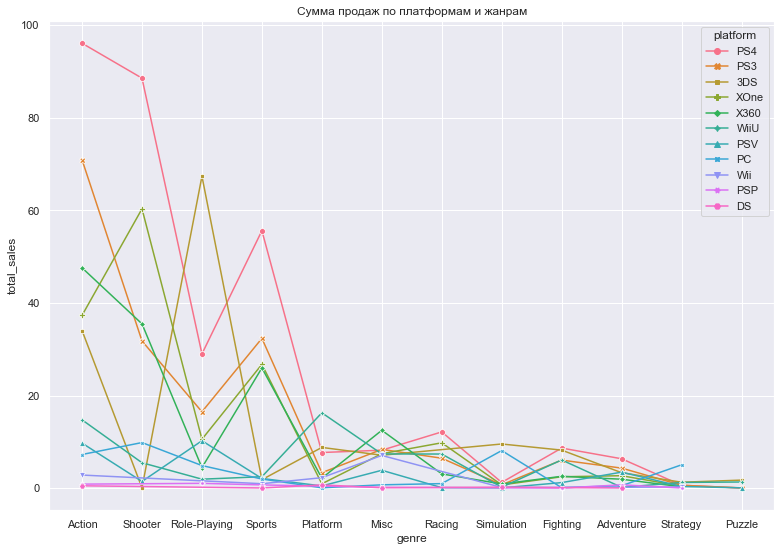

In [89]:
ax = (sns.lineplot(data=actual
                   .pivot_table(index=['platform','genre'], values='total_sales', aggfunc='sum')
                   .reset_index().sort_values(by='total_sales', ascending=False), x='genre', y='total_sales', hue='platform',
                   style='platform', markers=True, dashes=False)
     )
ax.set_title(r'Сумма продаж по платформам и жанрам');

Самый популярные жанры на PS4 и PS3 - Action; на 3DS - РПГ. На XOne - шутеры.

## Портрет пользователей по регионам <a id="11"></a>

### Топ-5 популярных платформ в регионах

In [90]:
# функция для создания сводных топ-5 по платформам, жанрам и возрастному рейтингу
def top_5(index, values):    
    top_5 = (actual.pivot_table(index=index, values=values, aggfunc='sum')
             .sort_values(by=values, ascending=False).reset_index()
            )
    top_5 = top_5.rename_axis('index1').reset_index()
    top_5[index] = np.where((top_5['index1'] > 4), 
                            ['Other' for item in top_5[index]], top_5[index])
    top_5 = (top_5.pivot_table(index=index, values=values, aggfunc='sum')
             .sort_values(by=values, ascending=False)
            )
    return top_5
top_5('platform', 'na_sales')

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
Other,52.49
3DS,38.20


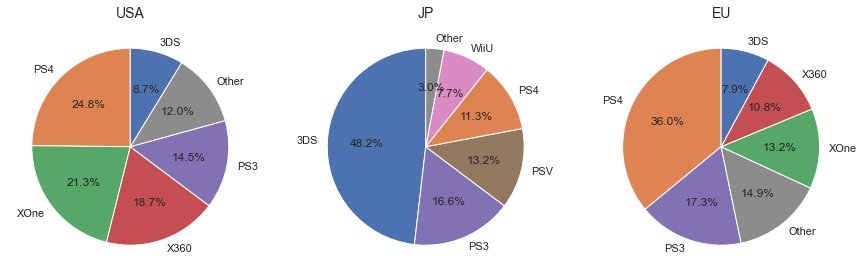

In [91]:
# подпространства для графиков
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(15, 15))
# Cоздаю списки и словари, чтобы закрепить цвета за каждой платформой
labels_1 = top_5('platform', 'na_sales').index.to_list()
labels_2 = top_5('platform', 'jp_sales').index.to_list()
labels_3 = top_5('platform', 'eu_sales').index.to_list()
colours = {'3DS': 'C0',
           'PS4': 'C1',
           'XOne': 'C2',
           'X360': 'C3',
           'PS3' : 'C4',
           'PSV' : 'C5',
           'WiiU' : 'C6',
           'Other' : 'C7'}
# рисую пироги
ax1.pie(top_5('platform', 'na_sales')['na_sales'], labels=top_5('platform', 'na_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_1], startangle=90)
ax1.set_title('USA',fontsize=14)
ax2.pie(top_5('platform', 'jp_sales')['jp_sales'], labels=top_5('platform', 'jp_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_2], startangle=90)
ax2.set_title('JP',fontsize=14)
ax3.pie(top_5('platform', 'eu_sales')['eu_sales'], labels=top_5('platform', 'eu_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_3], startangle=90)
ax3.set_title('EU',fontsize=14);

В США 25% предпочитают PS4 и 21% XOne, сравнимо. В Европе доминирует линейка PS: PS4 - 36%, PS3 - 17% и только потом XOne - 13%. То есть приставка старого поколения PS3 от Sony выигрывает у приставки более соврменного поколения XOne. В США Microsoft и Sony делят рынок примерно пополам, в Европе лидирует Сони - 53%. 

3DS от Нинтендо в США и Европе занимает 10 и 9 процентов, соответсвенно, а в Японии 48%, там своя атмосфера. 8% WiiU. PS3 и PS4 там тоже не популярны. Японцы отдают предпочтение Нинтендо. 

### Топ-5 жанров в регионах

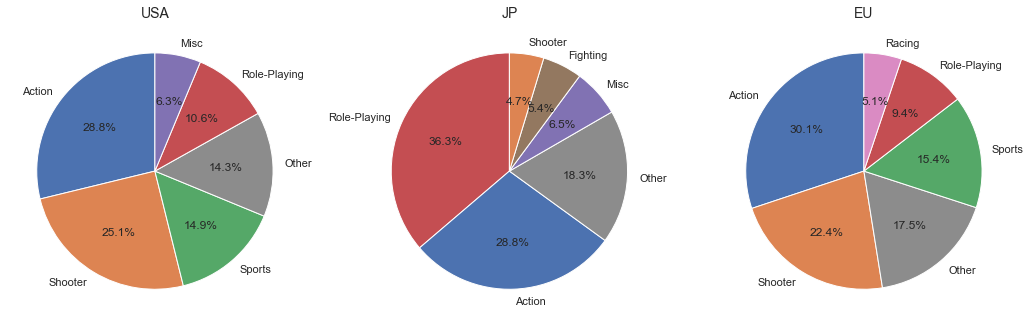

In [92]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(18, 18))

labels_1 = top_5('genre', 'na_sales').index.to_list()
labels_2 = top_5('genre', 'jp_sales').index.to_list()
labels_3 = top_5('genre', 'eu_sales').index.to_list()
colours = {'Action': 'C0',
           'Shooter': 'C1',
           'Sports': 'C2',
           'Role-Playing': 'C3',
           'Misc' : 'C4',
           'Fighting' : 'C5',
           'Racing' : 'C6',
           'Other' : 'C7'}

ax1.pie(top_5('genre', 'na_sales')['na_sales'], labels=top_5('genre', 'na_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_1], startangle=90)
ax1.set_title('USA',fontsize=14)
ax2.pie(top_5('genre', 'jp_sales')['jp_sales'], labels=top_5('genre', 'jp_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_2], startangle=90)
ax2.set_title('JP',fontsize=14)
ax3.pie(top_5('genre', 'eu_sales')['eu_sales'], labels=top_5('genre', 'eu_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_3], startangle=90)
ax3.set_title('EU',fontsize=14);

В США и Европе доли жанров практически одинаковые, за исключением того, что европейцы вместо аркад приобретают гонки. 

В Японии все, как всегда - по-другому. РПГ - 36% продаж от общего количества, Action - 29%. 5% продаж - Fighting. Достаточно популярный жанр в Европе и США Sports не интересен японцам.

### Влияние рейтинга ESRB на продажи по регионам <a id="8"></a>

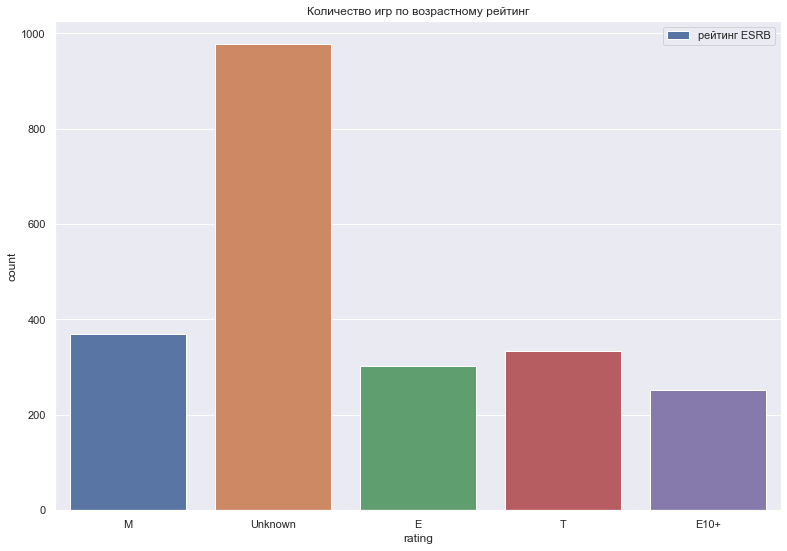

In [93]:
ax = sns.countplot(x='rating', data=actual);
plt.legend(labels=['рейтинг ESRB'])
ax.set_title(r'Количество игр по возрастному рейтинг');

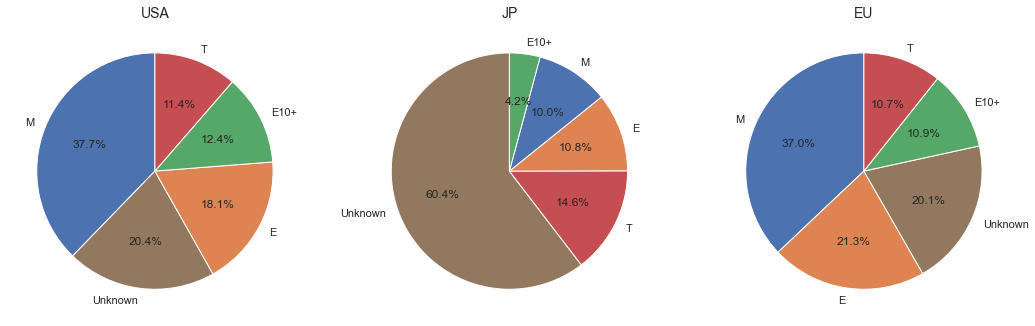

In [94]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
                                    ncols=3,
                                    nrows=1,
                                    figsize=(18, 18))

labels_1 = top_5('rating', 'na_sales').index.to_list()
labels_2 = top_5('rating', 'jp_sales').index.to_list()
labels_3 = top_5('rating', 'eu_sales').index.to_list()
colours = {'M': 'C0',
           'E': 'C1',
           'E10+': 'C2',
           'T': 'C3',
           'AO' : 'C4',
           'Unknown' : 'C5'}

ax1.pie(top_5('rating', 'na_sales')['na_sales'], labels=top_5('rating', 'na_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_1], startangle=90)
ax1.set_title('USA',fontsize=14)
ax2.pie(top_5('rating', 'jp_sales')['jp_sales'], labels=top_5('rating', 'jp_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_2], startangle=90)
ax2.set_title('JP',fontsize=14)
ax3.pie(top_5('rating', 'eu_sales')['eu_sales'], labels=top_5('rating', 'eu_sales').index, autopct='%1.1f%%',colors=[colours[key] for key in labels_3], startangle=90)
ax3.set_title('EU',fontsize=14);

В Японии большинство игр не определены по возрастной атегории, так как ESRB - присваивает рейтинг играм в США и Канаде - поэтому было бы некорректно оценивать корреляцию продаж в Японии по рейтингу ESRB.

В США и Европе все примерно одинаково. Большую часть рынка относительно других занимают игры для 17-летних и старше ~ 37%. 18% в США и 22% в Европе детям от 6 и старше (Е). Это соотвествует тому, что количество игр категории М самое большое - 360. Т рейтинга игр 330, но доля продаж таких игр значительно меньше ~ 11%. 

Видимо, игры с рейтингом E продаются лучше игр с рейтингом T.

## Проверка гипотез <a id="9"></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [95]:
# переменные для Xone и PC
XOne = actual.query('platform == "XOne"').dropna(subset=['user_score'], axis=0)
PC = actual.query('platform == "PC"').dropna(subset=['user_score'], axis=0)

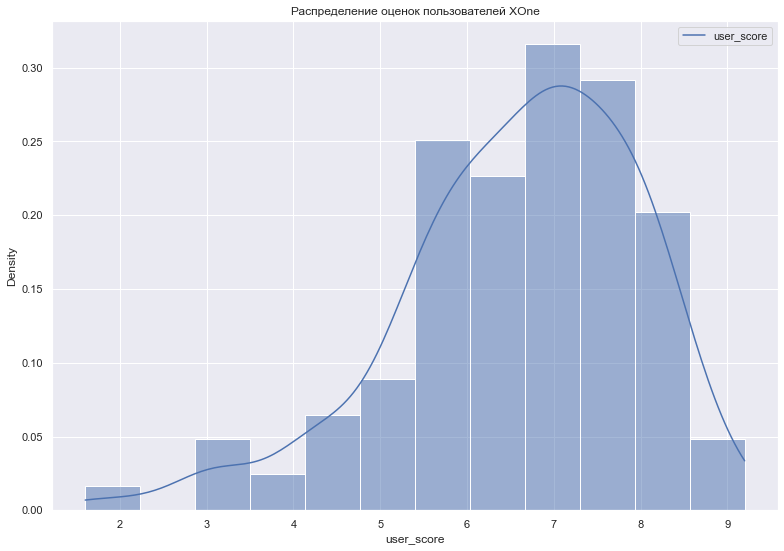

In [96]:
ax3 = sns.histplot(XOne['user_score'], kde=True, stat='density');
ax3.legend(labels=['user_score'])
ax3.set_title(r'Распределение оценок пользователей XOne');

Есть небольшой скос, левый хвост. Оценок около 2 мало, но я не буду их удалять, я не считаю, это выбросом. Распределение не совсем нормальное. Я воспользуюсь тестом Манна-Уитни, он не параметрический.

Можно ли было здесь воспользоваться тестом Стьюдента?

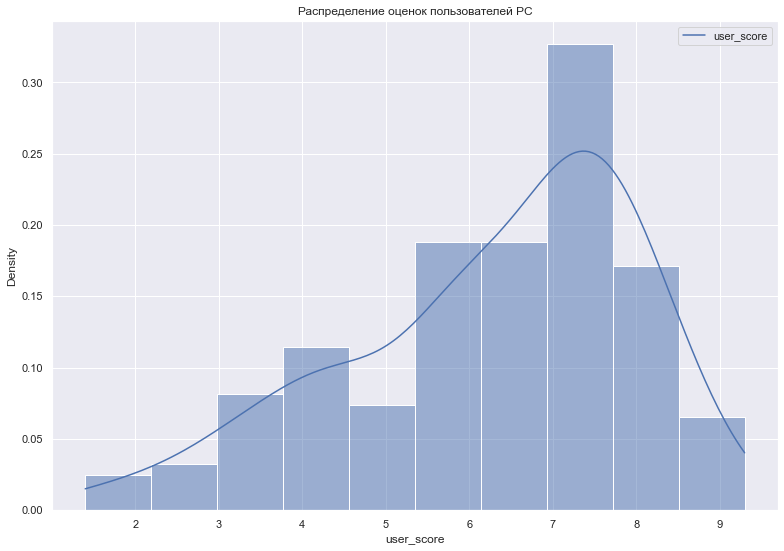

In [97]:
ax3 = sns.histplot(PC['user_score'], kde=True, stat='density');
ax3.legend(labels=['user_score'])
ax3.set_title(r'Распределение оценок пользователей PC');

Построю QQ график, для проверки на нормальность распределений.

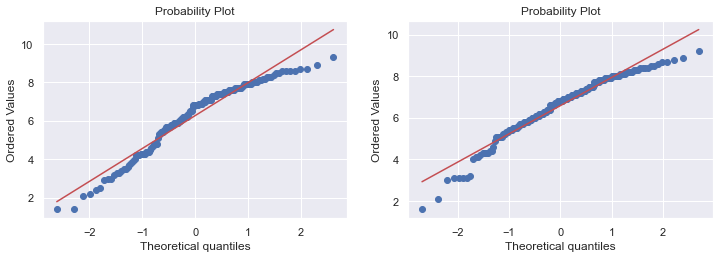

In [98]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(PC['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(XOne['user_score'], dist="norm", plot=plt)
plt.show()

Распределения у обоих платформ не нормальные, но это нормально.

#### Проверка гипотезы тестом Сьюдента

**Нулевая гипотеза:** средние оценки пользователей платформ XOne и PC одинаковы.

**Альтернативная гипотеза:** средние оценки пользователей платформ XOne и PC различны.

Уровень значимости: alpha = 0.05. Я выбираю такое значение alpha, так как считаю, что в данном исследование последствия ошибки первого рода не критичны.

In [99]:
results = st.ttest_ind(XOne['user_score'], PC['user_score'])

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.05918531620226154
Не получилось отвергнуть нулевую гипотезу


In [100]:
XOne['user_score'].mean()

6.5856410256410225

In [101]:
PC['user_score'].mean()

6.269677419354838

С вероятностью 6% разница между данными средними из выборок случайна. Нельзя точно сказать, что одно среднее больше или меньше другого. Следовательно, не можем отвергнуть нулевую гипотезу, но было близко.

### Средние пользовательские рейтинги жанров Action и Sports  одинаковые.

In [102]:
Action = actual.query('genre == "Action"').dropna(subset=['user_score'], axis=0)
Sports = actual.query('genre == "Sports"').dropna(subset=['user_score'], axis=0)

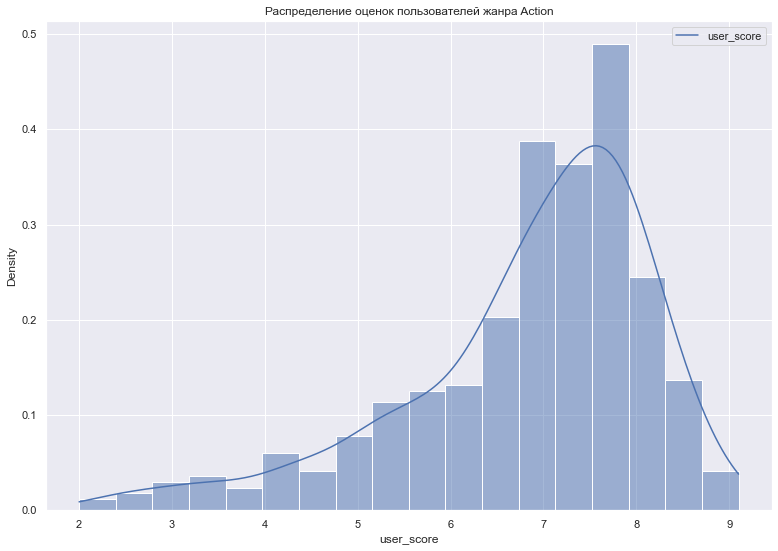

In [103]:
ax3 = sns.histplot(Action['user_score'], kde=True, stat='density');
ax3.legend(labels=['user_score'])
ax3.set_title(r'Распределение оценок пользователей жанра Action');

Оценок меньше 4 очень мало, но я все-таки считаю, что когда дело касается оценок, удалять их некорректно, искажение данных. Нет?

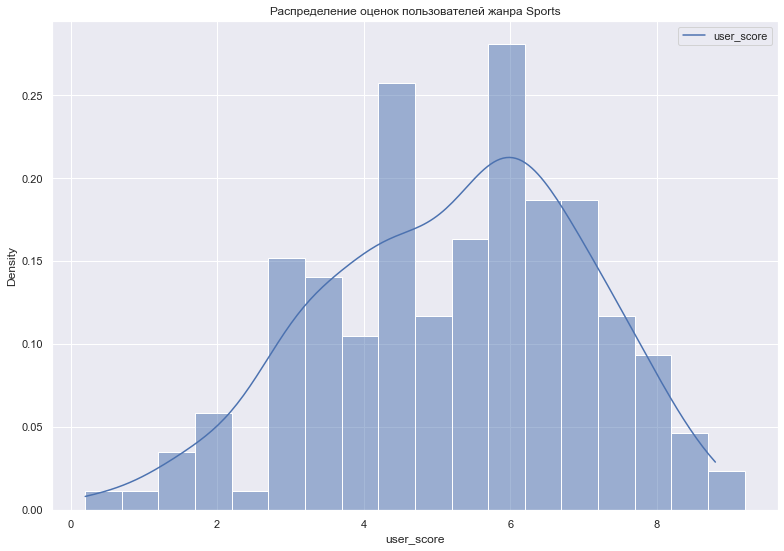

In [104]:
ax3 = sns.histplot(Sports['user_score'], kde=True,binwidth=0.5, stat='density');
ax3.legend(labels=['user_score'])
ax3.set_title(r'Распределение оценок пользователей жанра Sports');

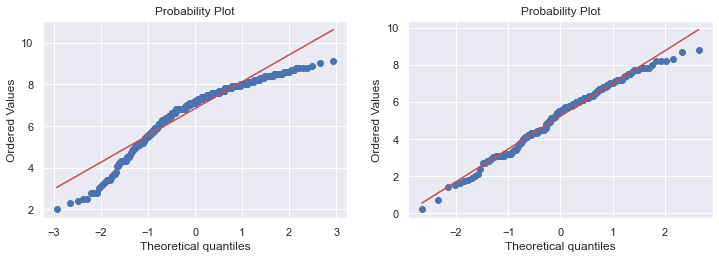

In [105]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(Action['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(Sports['user_score'], dist="norm", plot=plt)
plt.show()

Оба распределения не нормальны

#### Проверка гипотезы тестом Манна-Уитни

**Нулевая гипотеза:** средние оценки пользователей жанров Action и Sports одинаковы.

**Альтернативная гипотеза:** средние оценки пользователей жанров Action и Sports различны.

Уровень значимости: alpha = 0.05. Я выбираю такое значение alpha, так как считаю, что в данном исследование последствия ошибки первого рода не критичны.

In [106]:
results = st.ttest_ind(Action['user_score'], Sports['user_score'])

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.9225406969571677e-30
Отвергаем нулевую гипотезу


Вероятность, что различия средних случайна крайне мала. Проверим одностороннюю гипотезу.

**Нулевая гипотеза:** средние оценки пользователей жанров Action и Sports одинаковы.

**Альтернативная гипотеза:** средняя оценка пользователей жанра Action выше жанра Sports.

In [107]:
results = st.mannwhitneyu(Action['user_score'], Sports['user_score'], alternative='greater')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.3678419896494985e-26
Отвергаем нулевую гипотезу


In [108]:
results = st.ttest_ind(Action['user_score'], Sports['user_score'], alternative='greater')

alpha = 0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4612703484785838e-30
Отвергаем нулевую гипотезу


In [109]:
Action['user_score'].mean()

6.837647058823535

In [110]:
Sports['user_score'].mean()

5.218713450292398

Низкое значение p-value, говорит о том, вероятность, что разница между оценками жанров не случайно. Вероятно во всей генеральной совокупности оценка пользователей жанра Action выше Sports 

## Общий вывод <a id="10"></a>

Промежуточные выводы:

* Продажи игр падает, начиная с 2010 года. **2010 г. - 600 млн.**; **2015 г. - 280 млн.** Наряду с этим, количество выпускаемых игр растет от года в год.

* В жанрах больше всех приносит прибыль:
    1. Экшен - 360 млн.
    2. Шутер - 240 млн.
    3. РПГ испортивные соревнования - 150 млн.
    
 Самые стабильные из них шутеры и спортивные симуляторы, Экшен и РПГ сильно зависят от успешности конкретных игр, много выбросов.

* Смена поколений платформ составляет **7-8 лет**. PS4 и XOne - 2013, 2017 вне зоны риска, еще актуально будет выпускать на этих платформах игры и, соответсвенно, рекламировать. Япония выглядет рискованно для вложений, платформа 3DS устаревает, есть вероятность, что скоро на смену ей придет новая.

* Если есть информация о оценке критиков игре жанра экшен, и она **больше 80 баллов**, то рекламный бюджет можно распределить на эту игру на платформе PS4 в регионах Северной Америки и Европы.

**Итог:**

**Оптимально будет распределить рекламный бюджет на игры жанра шутер по платформам PS4 и XOne в регионе Северной Америки, если делать рекламу в Европе, то XOne лучше исключать - она занимает там 13% от рынка. При распределении бюджета рекламных компаний не стоит обращать внимание на оценку пользователей.**